Linear Regression:
  Mean Squared Error: 0.4139
  R-squared Score: 0.5778

Random Forest:
  Mean Squared Error: 0.0068
  R-squared Score: 0.9931

SVR:
  Mean Squared Error: 0.0444
  R-squared Score: 0.9547



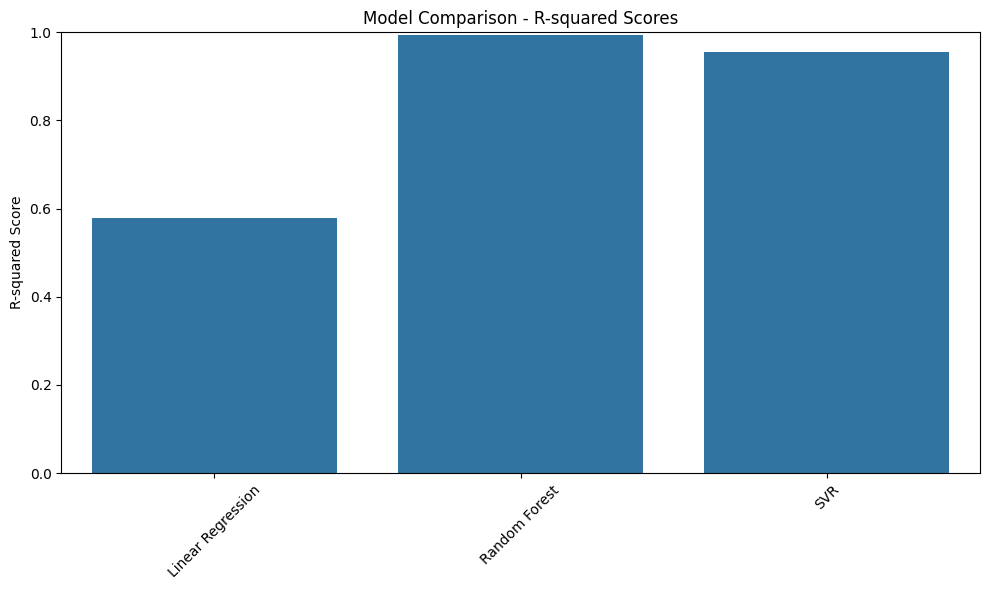

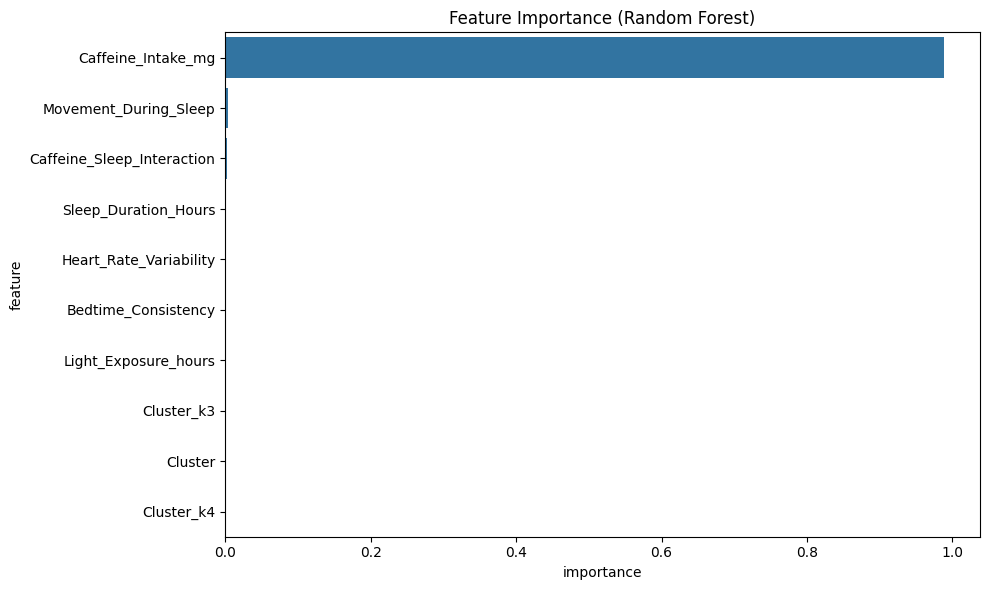

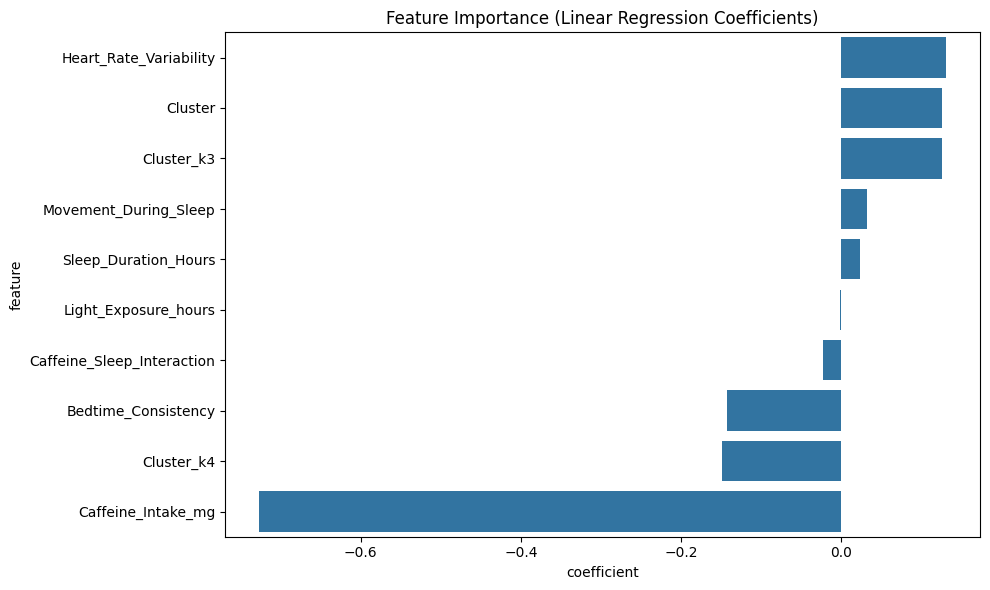

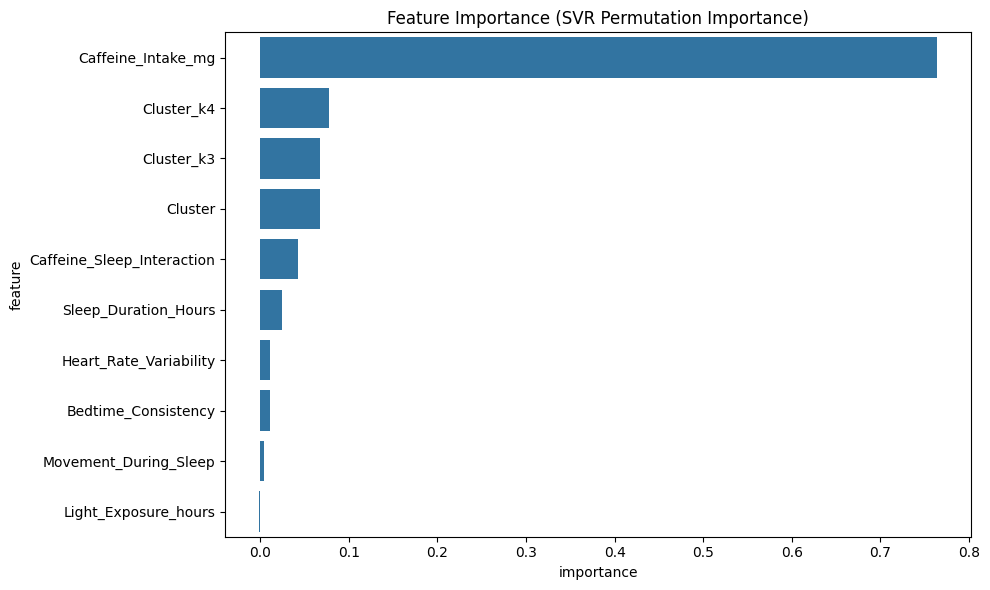

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten einlesen
df_imputed = pd.read_csv('../data/imputed_dataset.csv')

# Teilen Sie die Daten in Features (X) und Zielwariable (y)
X = df_imputed.drop('Sleep_Quality_Score', axis=1)
y = df_imputed['Sleep_Quality_Score']

# Teilen Sie die Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisieren Sie die Modelle
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Dictionary zum Speichern der Ergebnisse
results = {}

# Trainieren und bewerten Sie jedes Modell
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Ergebnisse ausgeben
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"  R-squared Score: {metrics['R2']:.4f}")
    print()

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=[r['R2'] for r in results.values()])
plt.title('Model Comparison - R-squared Scores')
plt.ylabel('R-squared Score')
plt.ylim(0, 1)  # R-squared ist normalerweise zwischen 0 und 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Importance für Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


# Feature Importance für Lineare Regression
lr_model = models['Linear Regression']
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': lr_model.coef_})
coefficients = coefficients.sort_values('coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=coefficients)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.tight_layout()
plt.show()


from sklearn.inspection import permutation_importance

# Feature Importance für SVR durch Permutation
svr_model = models['SVR']
result = permutation_importance(svr_model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
permutation_importance_df = pd.DataFrame({'feature': X.columns, 'importance': result.importances_mean})
permutation_importance_df = permutation_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=permutation_importance_df)
plt.title('Feature Importance (SVR Permutation Importance)')
plt.tight_layout()
plt.show()



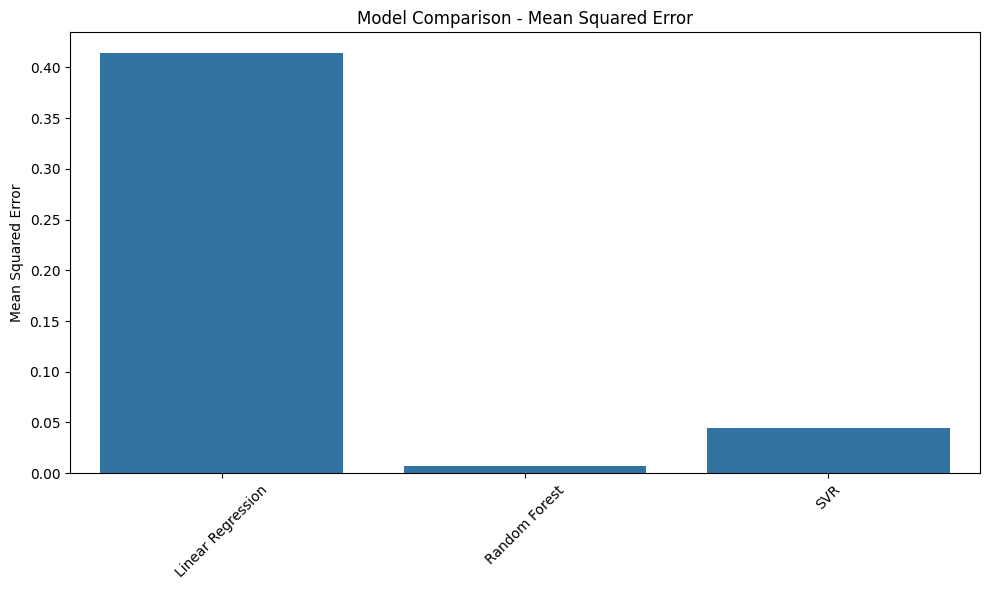

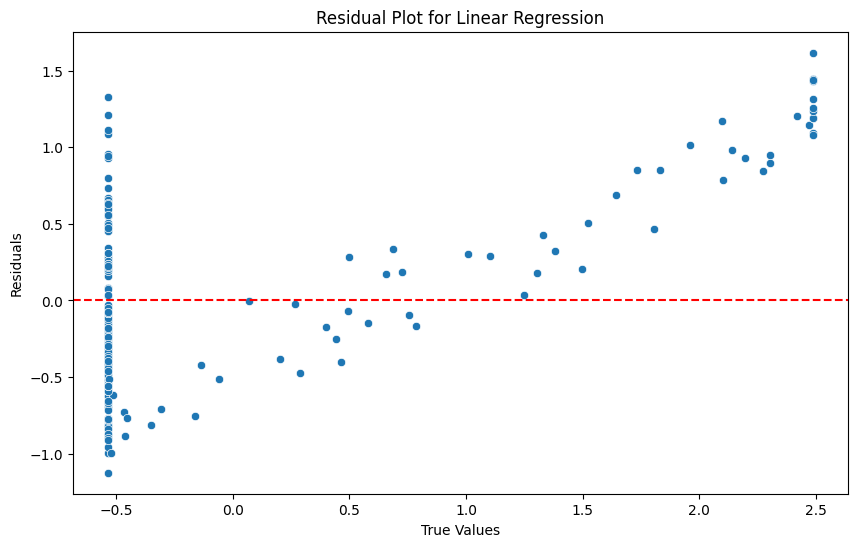

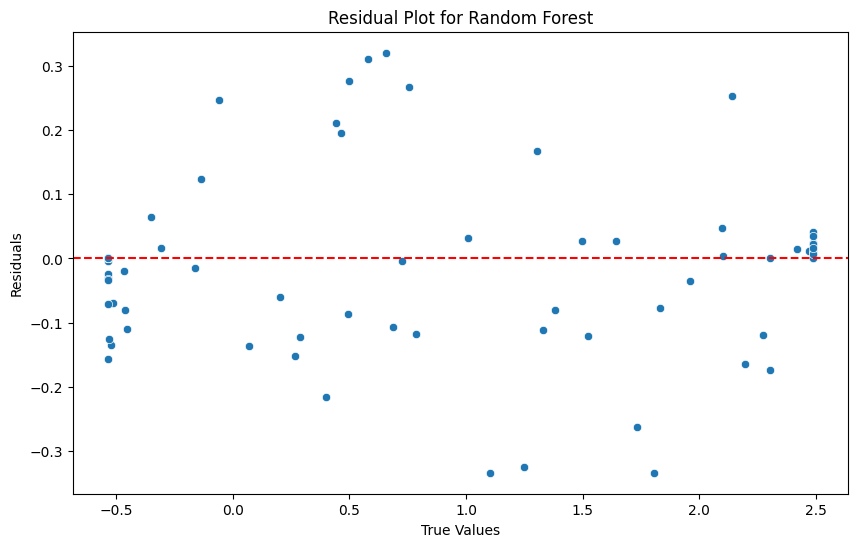

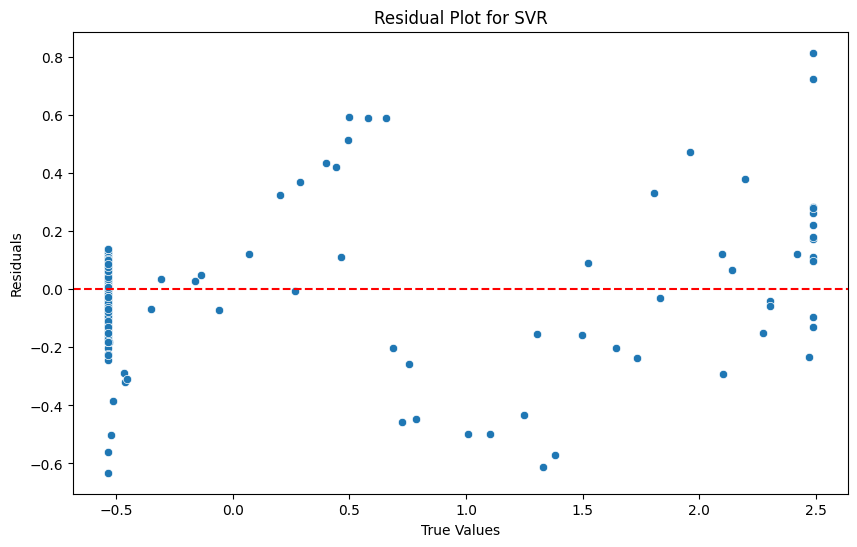

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=[r['MSE'] for r in results.values()])
plt.title('Model Comparison - Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(0, linestyle='--', color='red')
    plt.title(f'Residual Plot for {name}')
    plt.xlabel('True Values')
    plt.ylabel('Residuals')
    plt.show()



